# Attribution Metric Visualization

This notebook plots AOPC and LogOdds curves for multiple attribution methods.

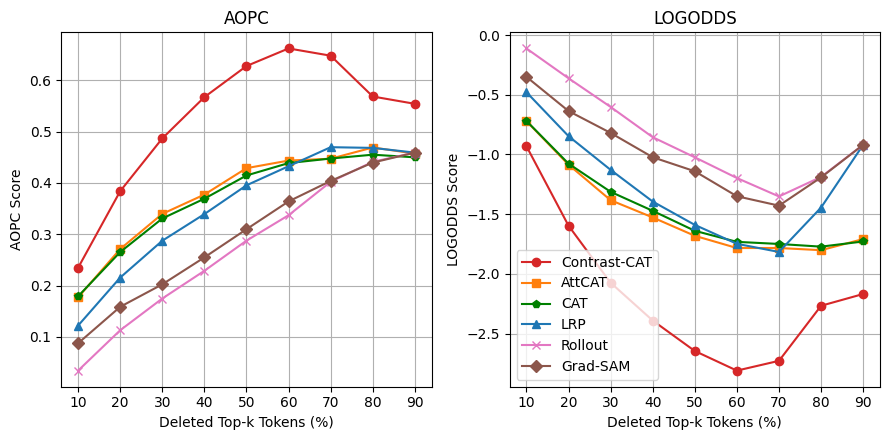

In [1]:
import pickle
import matplotlib.pyplot as plt

################################################
dataset_name = "sst2"
################################################

# List of methods and their display names
methods = ['contrastcat', 'attcat', 'cat', 'lrp', 'rollout', 'gradsam']
legend_list = ['Contrast-CAT', 'AttCAT', 'CAT', 'LRP', 'Rollout', 'Grad-SAM']
metrics = ["aopc", "logodds"]
x_labels = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Plot style
style_map = {
    'Contrast-CAT': {'marker': 'o', 'color': 'tab:red'},
    'AttCAT':       {'marker': 's', 'color': 'tab:orange'},
    'CAT':          {'marker': 'p', 'color': 'green'},  
    'LRP':          {'marker': '^', 'color': 'tab:blue'},
    'Rollout':      {'marker': 'x', 'color': 'tab:pink'},
    'Grad-SAM':     {'marker': 'D', 'color': 'tab:brown'}
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4.5), sharey=False)
m_size = 6

for ax_idx, metric in enumerate(metrics):
    ax = axes[ax_idx]
    for i, method in enumerate(methods):
        label = legend_list[i]
        style = style_map[label]
        
        file_path = f"./stats/{dataset_name}/eval_results_{method}.pickle"
        with open(file_path, 'rb') as f:
            score_dict = pickle.load(f)
        y_values = score_dict[metric]
        
        ax.plot(
            y_values, 
            marker=style['marker'], 
            color=style['color'], 
            label=label, 
            markersize=m_size
        )

    ax.set_title(metric.upper())
    ax.set_xticks(range(9))
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('Deleted Top-k Tokens (%)')
    ax.set_ylabel(f'{metric.upper()} Score')
    ax.grid(True)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()